# Question 1

51
100
105
256


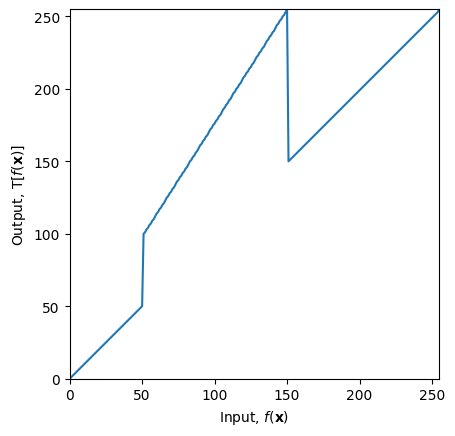

(810, 720)


In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0]+1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t2))


t3 = np.linspace(c[3,1], 255, 255 - c[3,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\emma.jpg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)

cv.destroyAllWindows()

# Question 2

101
50
105
256


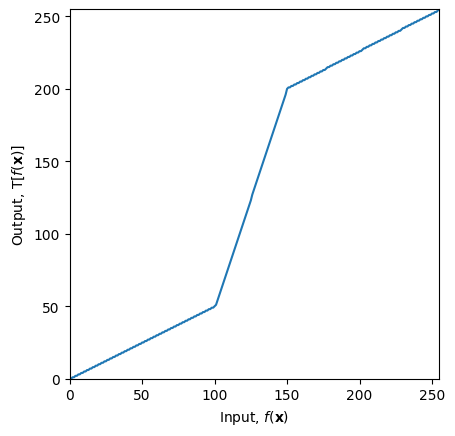

(217, 181)


In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0, c[0,1], c[0,0]+1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform,t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)

cv.destroyAllWindows()

# Question 3

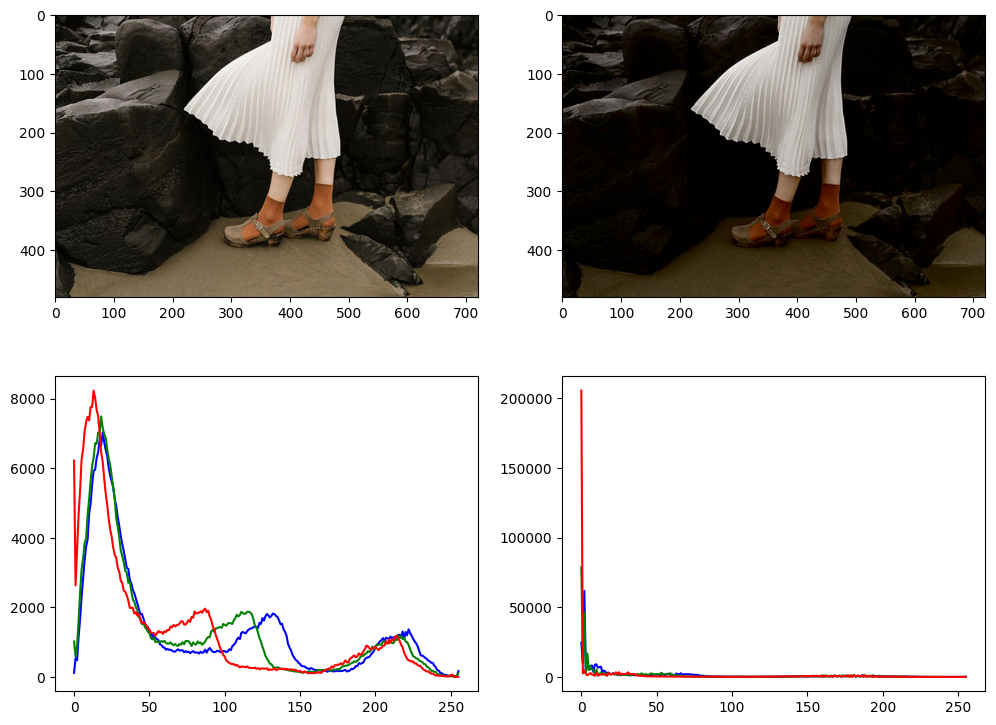

In [4]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\highlights_and_shadows.jpg', cv.IMREAD_COLOR)

lab_img = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
L,a,b = cv.split(lab_img)
gamma = 2
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(L, table)
new_lab_img = cv.merge((img_gamma,a,b))
new_img = cv.cvtColor(new_lab_img, cv.COLOR_LAB2BGR)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(new_img, cv.COLOR_BGR2RGB)


fig, axarr = plt.subplots(2, 2, figsize=(12, 9))
axarr[0, 0].imshow(img_orig)
axarr[0, 1].imshow(img_gamma)
colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist_orig = cv.calcHist([img_orig], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_gamma, color=c)

plt.show()

# Question 4

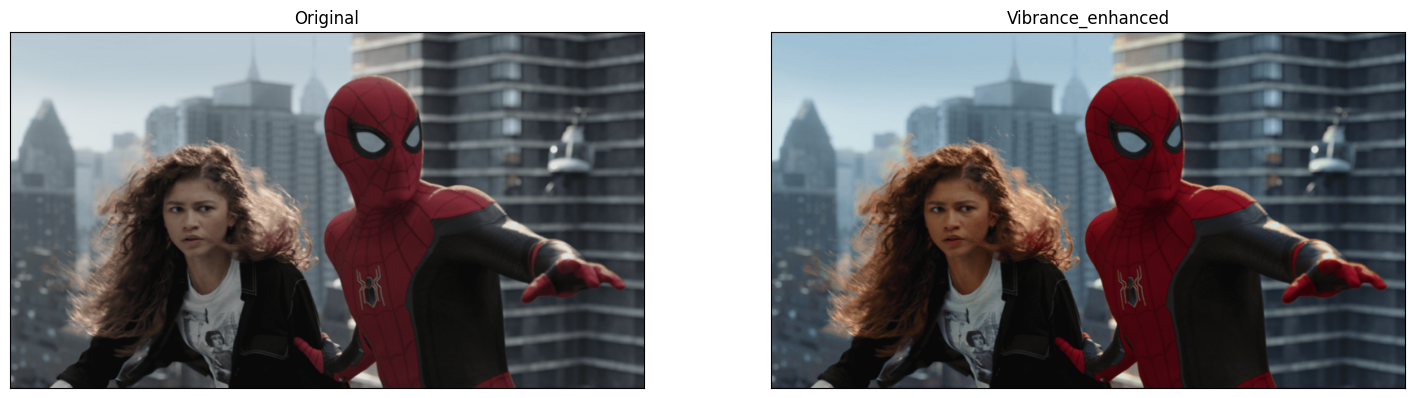

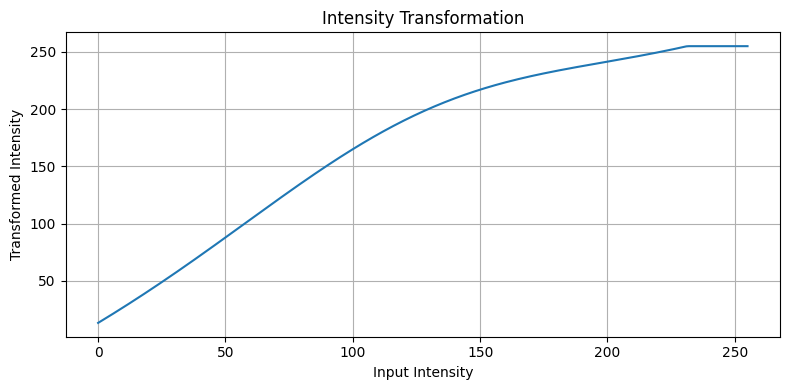

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Function for intensity transformation
def transformation(x, a, sig = 70):
     return np.minimum(x + ((a*128) * np.exp(-(x - 128)**2 / (2 * sig**2))), 255)
     

img_orig = cv.imread(r'C:\Users\nuwan\Downloads\spider.png')
color_img = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
hsv_img = cv.cvtColor(color_img, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value.
hue, saturation, value = cv.split(hsv_img)

# Intensity transformation to the saturation plane.
a = 0.55

transformed_vec = np.vectorize(transformation)
transformed = transformed_vec(saturation, a).astype(np.uint8)

new_hsv_image = cv.merge((hue, transformed, value))
new_image = cv.cvtColor(new_hsv_image, cv.COLOR_HSV2BGR)

# Display the images.
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(18, 9))
axes[0].imshow(color_img)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(new_image)
axes[1].set_title('Vibrance_enhanced')
axes[1].set_xticks([]), axes[1].set_yticks([])

# Plot the intensity transformation function
plt.figure(figsize=(8, 4))
x = np.linspace(0, 255, 256)
transformation_curve = transformation(x, a)
plt.plot(x, transformation_curve)
plt.title("Intensity Transformation")
plt.xlabel("Input Intensity")
plt.ylabel("Transformed Intensity")
plt.grid()

plt.tight_layout()
plt.show()


# Question 5

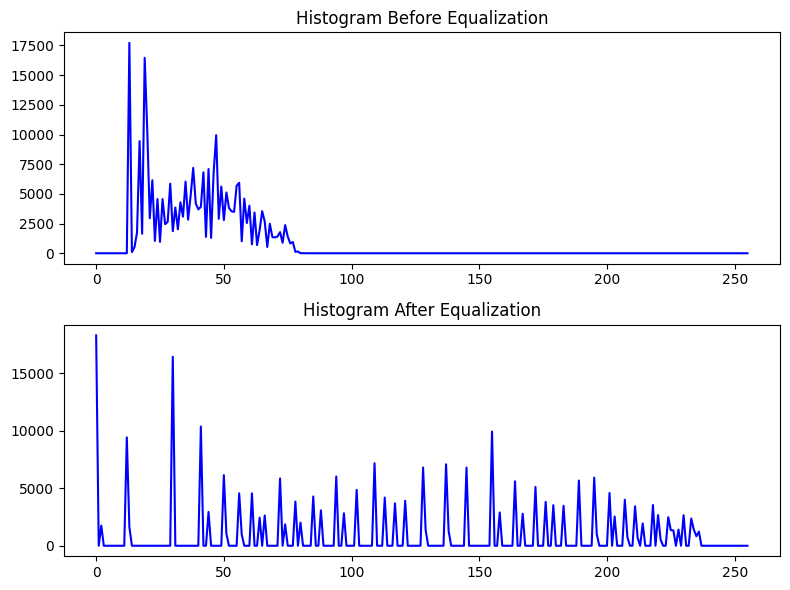

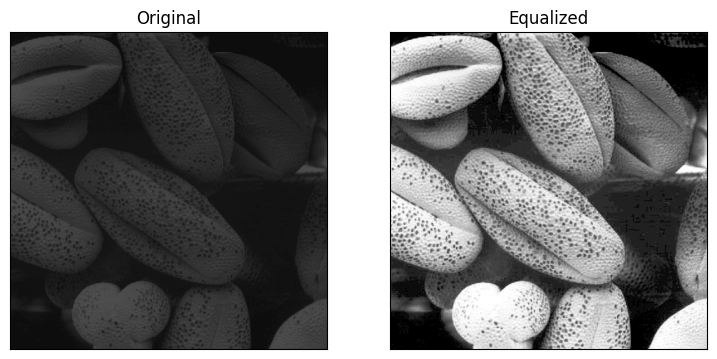

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the image
image = cv.imread(r'C:\Users\nuwan\Downloads\shells.tif')
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def histogram_equalization(image):
    def calculate_histogram(image):
        histogram = Counter(image.flatten())
        return histogram

    def calculate_cdf(histogram):
        cdf = dict()
        cum_sum = 0
        for intensity, freq in sorted(histogram.items()):
            cum_sum += freq
            cdf[intensity] = cum_sum
        return cdf

    def normalize_cdf(cdf, image):
        cdf_min = min(cdf.values())
        normalized_cdf = {k: ((v-cdf_min)/(image.size-1))*255 for k, v in cdf.items()}
        return normalized_cdf

    histogram = calculate_histogram(image)
    cdf = calculate_cdf(histogram)
    normalized_cdf = normalize_cdf(cdf, image)
    equalized_image = np.array([[normalized_cdf[pixel] for pixel in row] for row in image])
    return equalized_image


equalized_image = histogram_equalization(gray_image)

hist_original, _ = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])
hist_equalized, _ = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

# Display histograms
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(hist_original, color='blue')
plt.title("Histogram Before Equalization")

plt.subplot(2, 1, 2)
plt.plot(hist_equalized, color='blue')
plt.title("Histogram After Equalization")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(9, 9))
axes[0].imshow(image, cmap="gray")
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(equalized_image, cmap="gray")
axes[1].set_title('Equalized')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()
